This is the actual notebook you want to run.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from xgboost import XGBRegressor

from data_dicts_values import drop_cols
from data_prep_values import county_info_2012, county_info_2016, county_info_2018, results_info
from model_prep import lin_mod_func, run_model, make_predictions, combine_predictions
from visualizations import display_results

## Data

The demographic information was obtained from the U.S. Cencus website. The 5 year study was used in order to obtain the most accurate information for smaller countues. The results data was obtained from the MIT Election Data and Science Lab.

Note: Due to issues with demographic info for Alaska, the state of Alaska is not incorporated into our analysis. These issues will be addressed at a later time.

In [2]:
features_2012 = county_info_2012()
features_2016 = county_info_2016()
features_2018 = county_info_2018()
results_2012 = results_info(2012)
results_2016 = results_info(2016)

In [3]:
df_2012 = pd.merge(features_2012, results_2012, on='County')
df_2012 = df_2012.drop(columns='State_y')
df_2012 = df_2012.rename(columns={'State_x': 'State'})

In [4]:
df_2016 = pd.merge(features_2016, results_2016, on='County')
df_2016 = df_2016.drop(columns='State_y')
df_2016 = df_2016.rename(columns={'State_x': 'State'})

## Early Data Assessment

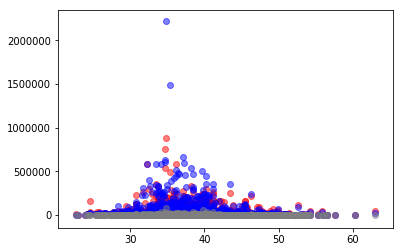

In [5]:
plt.scatter(df_2012['Median age'], df_2012['Republican'], c='red', alpha=0.5)
plt.scatter(df_2012['Median age'], df_2012['Democrat'], c='blue', alpha=0.5)
plt.scatter(df_2012['Median age'], df_2012['Other'], c='gray', alpha=0.5)
plt.show()

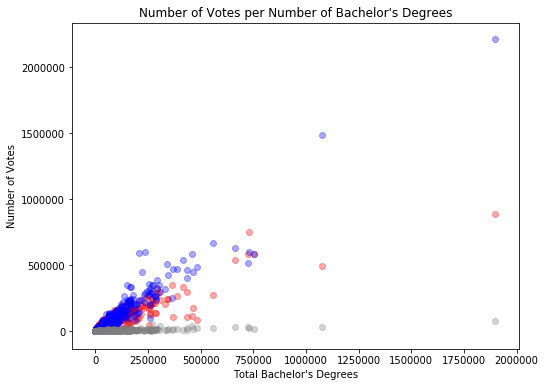

In [6]:
plt.figure(figsize=[8,6])
plt.scatter(df_2012["Total Bachelor's degree"], df_2012['Republican'], c='red', alpha=0.333)
plt.scatter(df_2012["Total Bachelor's degree"], df_2012['Democrat'], c='blue', alpha=0.333)
plt.scatter(df_2012["Total Bachelor's degree"], df_2012['Other'], c='gray', alpha=0.333)
plt.title("Number of Votes per Number of Bachelor's Degrees")
plt.xlabel("Total Bachelor's Degrees")
plt.ylabel("Number of Votes")
#plt.xticks(ticks=[1,2,3])
plt.show()

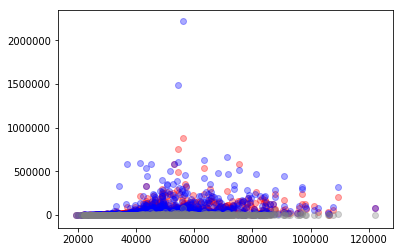

In [7]:
plt.scatter(df_2012['Households Median income'], df_2012['Republican'], c='red', alpha=0.333)
plt.scatter(df_2012['Households Median income'], df_2012['Democrat'], c='blue', alpha=0.333)
plt.scatter(df_2012['Households Median income'], df_2012['Other'], c='gray', alpha=0.333)
plt.show()

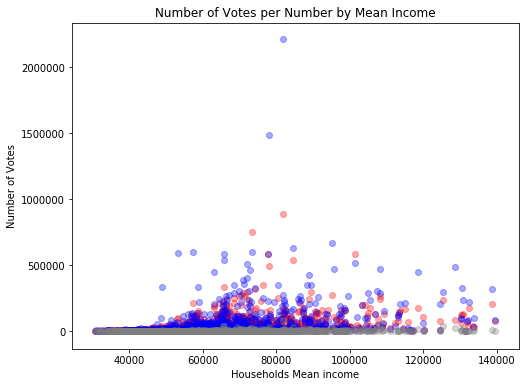

In [8]:
plt.figure(figsize=[8,6])
plt.scatter(df_2012['Households Mean income'], df_2012['Republican'], c='red', alpha=0.333)
plt.scatter(df_2012['Households Mean income'], df_2012['Democrat'], c='blue', alpha=0.333)
plt.scatter(df_2012['Households Mean income'], df_2012['Other'], c='gray', alpha=0.333)
plt.title("Number of Votes per Number by Mean Income")
plt.xlabel("Households Mean income")
plt.ylabel("Number of Votes")
#plt.xticks(ticks=[1,2,3])
plt.show()

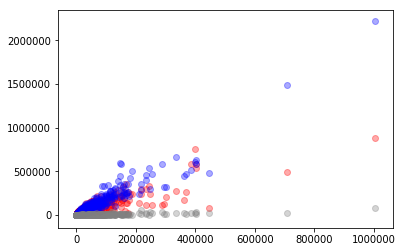

In [9]:
plt.scatter(df_2012['Total Graduate or professional degree'], df_2012['Republican'], c='red', alpha=0.333)
plt.scatter(df_2012['Total Graduate or professional degree'], df_2012['Democrat'], c='blue', alpha=0.333)
plt.scatter(df_2012['Total Graduate or professional degree'], df_2012['Other'], c='gray', alpha=0.333)
plt.show()

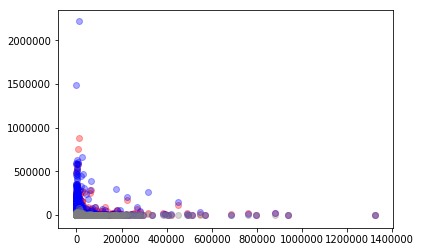

In [10]:
plt.scatter(df_2012['Total Black or African American'], df_2012['Republican'], c='red', alpha=0.333)
plt.scatter(df_2012['Total Black or African American'], df_2012['Democrat'], c='blue', alpha=0.333)
plt.scatter(df_2012['Total Black or African American'], df_2012['Other'], c='gray', alpha=0.333)
plt.show()

In [11]:
X_train = df_2012.drop(columns=drop_cols)
X_test = df_2016.drop(columns=drop_cols)
scaler = StandardScaler()
mms = MinMaxScaler()
mms.fit(X_train)
#scaler.fit(X_train)

X_train_scale = mms.transform(X_train)
X_test_scale = mms.transform(X_test)
# X_train_scale = scaler.transform(X_train)
# X_test_scale = scaler.transform(X_test)

y_train_R = df_2012['Republican']
y_train_D = df_2012['Democrat']
y_train_O = df_2012['Other']

y_test_R = df_2016['Republican']
y_test_D = df_2016['Democrat']
y_test_O = df_2016['Other']

XGB = XGBRegressor(random_state=2020)

parameters = {}

# parameters = {'max_depth': [4, 5, 6, 7, 8],
#               'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5]}

In [12]:
model_tuned_R = GridSearchCV(XGB, parameters, cv=5, n_jobs= -1)
model_tuned_R.fit(X_train_scale, y_train_R)
model_tuned_R.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=2020,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=True, subsample=1)

In [13]:
model_tuned_D = GridSearchCV(XGB, parameters, cv=5, n_jobs= -1)
model_tuned_D.fit(X_train_scale, y_train_D)
model_tuned_D.best_estimator_

/Users/stevedye/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=2020,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=True, subsample=1)

In [14]:
# model_tuned_O = GridSearchCV(XGB, parameters, cv=5, n_jobs= -1)

model_tuned_O = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bytree=1, gamma=0, learning_rate=0.3, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=2020,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=True, subsample=1)

model_tuned_O.fit(X_train_scale, y_train_O)
#model_tuned_O.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bytree=1, gamma=0, learning_rate=0.3, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=2020,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=True, subsample=1)

In [15]:
print(model_tuned_R.best_estimator_)
print(model_tuned_D.best_estimator_)
#print(model_tuned_O.best_estimator_)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=2020,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=True, subsample=1)
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=2020,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=True, subsample=1)


In [16]:
predictions_R = make_predictions('Republican', model_tuned_R, X_test_scale, y_test_R, df_2016)
predictions_D = make_predictions('Democrat', model_tuned_D, X_test_scale, y_test_D, df_2016)
predictions_O = make_predictions('Other', model_tuned_O, X_test_scale, y_test_O, df_2016)

In [17]:
predictions_2016 = combine_predictions(predictions_R, predictions_D,
                                       predictions_O, df_2016)

predictions_2016 = predictions_2016.drop(columns=['Republican_y', 'Democrat_y', 'Other_y'])
predictions_2016 = predictions_2016.rename(columns={'Republican_x': 'Republican',
                                                    'Democrat_x': 'Democrat',
                                                    'Other_x': 'Other'})

In [18]:
states = predictions_2016.State.unique().tolist()

interests2 = ['County','Republican','Republican Predictions',
              'Democrat', 'Democrat Predictions', 'Other','Other Predictions']

In [19]:
predictions_2016[interests2].sample(10).round()

,County,Republican,Republican Predictions,Democrat,Democrat Predictions,Other,Other Predictions
813,"Fulton County, Indiana, 2016",6010,8259.0,1960,8911.0,404,-145.0
852,"Porter County, Indiana, 2016",38832,20702.0,33676,17559.0,4682,-456.0
788,"Woodford County, Illinois, 2016",13207,18481.0,5092,8911.0,1565,-166.0
1708,"Madison County, Montana, 2016",3297,11280.0,1180,8579.0,301,-172.0
2844,"Utah County, Utah, 2016",102182,48904.0,28522,60652.0,70847,778.0
596,"Cassia County, Idaho, 2016",5949,10818.0,1036,9268.0,1193,-20.0
1421,"Wilkin County, Minnesota, 2016",2129,8283.0,893,8527.0,280,-198.0
336,"Summit County, Colorado, 2016",5100,14712.0,9557,9689.0,1517,262.0
1696,"Williams County, North Dakota, 2016",10069,15896.0,1735,10206.0,1003,102.0
131,"Lawrence County, Alabama, 2016",10833,15028.0,3627,14744.0,369,2364.0


In [20]:
interests = ['Republican','Republican Predictions',
             'Democrat', 'Democrat Predictions',
             'Other','Other Predictions']

In [21]:
state_results = pd.DataFrame(states)
results = pd.DataFrame()
state_results = state_results.rename(columns={0: 'State'})
for state in states:
    results = results.append(predictions_2016[predictions_2016.State == state][interests].sum(),
                                     ignore_index=True)

state_results = state_results.merge(results, left_index=True, right_index=True)
state_results['Winner'] = state_results['Democrat Predictions'] - state_results['Republican Predictions']
state_results['Winner'] = state_results['Winner'].astype(int)
state_results['Democrat'] = state_results['Democrat'].astype(int)
state_results['Democrat Predictions'] = state_results['Democrat Predictions'].astype(int)
state_results['Other'] = state_results['Other'].astype(int)
state_results['Other Predictions'] = state_results['Other Predictions'].astype(int)
state_results['Republican'] = state_results['Republican'].astype(int)
state_results['Republican Predictions'] = state_results['Republican Predictions'].astype(int)

In [22]:
state_results

,State,Democrat,Democrat Predictions,Other,Other Predictions,Republican,Republican Predictions,Winner
0,Alabama,729547,1649412,75570,152670,1318250,1511365,138046
1,Arizona,1161167,507449,190709,7232,1252401,672104,-164655
2,Arkansas,380494,779283,64530,874,684872,1183686,-404403
3,Illinois,3090729,2467439,321963,39052,2146015,2044279,423160
4,California,8753788,2954160,943997,39859,4483810,2800428,153731
5,Colorado,1338870,2135596,238866,63464,1202484,1048732,1086864
6,Connecticut,897572,1338467,74133,55105,673215,300462,1038005
7,Delaware,235603,305558,22267,9845,185127,108523,197035
8,Florida,4501194,4813960,296919,111863,4611108,2248907,2565053
9,Georgia,1877963,2697764,147644,37976,2089104,2940895,-243131


In [23]:
print(state_results['Democrat Predictions'].sum(),
      state_results['Republican Predictions'].sum(),
      state_results['Other Predictions'].sum())

print(state_results['Democrat'].sum(),
      state_results['Republican'].sum(),
      state_results['Other'].sum())

65758538 62456171 1256486
64274035 62037609 7495173


## Predict 2020 with only 2012

In [24]:
features_2020 = features_2018.drop(columns=['County','Total population'])
X = features_2020
mms.fit(X)
X_test_2020 = features_2020

X = mms.transform(X)
X_test_2020_scale = mms.transform(X_test_2020)
# X = scaler.transform(X)
# X_test_2020_scale = scaler.transform(X_test_2020)

y_hat_R = model_tuned_R.predict(X)
y_hat_D = model_tuned_D.predict(X)
y_hat_O = model_tuned_O.predict(X)

In [25]:
res_1220 = pd.DataFrame(df_2016['County']).merge(pd.DataFrame(y_hat_R),
                                                 left_index=True, right_index=True)
res_1220 = res_1220.rename(columns={0: 'Republican Predictions'})
res_1220['Republican Predictions'] = res_1220['Republican Predictions'].astype(int)
res_1220 = res_1220.merge(pd.DataFrame(y_hat_D), left_index=True, right_index=True)
res_1220 = res_1220.rename(columns={0: 'Democrat Predictions'})
res_1220['Democrat Predictions'] = res_1220['Democrat Predictions'].astype(int)
res_1220 = res_1220.merge(pd.DataFrame(y_hat_O), left_index=True, right_index=True)
res_1220 = res_1220.rename(columns={0: 'Other Predictions'})
res_1220['Other Predictions'] = res_1220['Other Predictions'].astype(int)

In [26]:
res_1220

,County,Republican Predictions,Democrat Predictions,Other Predictions
0,"Wilcox County, Alabama, 2016",6850,60933,86
1,"Winston County, Alabama, 2016",18230,92342,1459
2,"Apache County, Arizona, 2016",1579,12990,100
3,"Cochise County, Arizona, 2016",-2156,50649,-93
4,"Coconino County, Arizona, 2016",-824,47723,306
...,...,...,...,...
3059,"Teton County, Wyoming, 2016",6364,72970,362
3060,"Uinta County, Wyoming, 2016",-6160,51459,355
3061,"Washakie County, Wyoming, 2016",-3132,51435,616
3062,"Weston County, Wyoming, 2016",-1600,60951,-54


In [27]:
res_1220.sample(5)

,County,Republican Predictions,Democrat Predictions,Other Predictions
2364,"Horry County, South Carolina, 2016",-7107,48399,61
732,"Ohio County, Kentucky, 2016",-4990,45847,130
256,"San Francisco County, California, 2016",-818,-16349,344
819,"Harrison County, Indiana, 2016",-5952,47741,-104
654,"Breckinridge County, Kentucky, 2016",-5060,48558,170


In [28]:
print(res_1220['Democrat Predictions'].sum(),
      res_1220['Republican Predictions'].sum(),
      res_1220['Other Predictions'].sum())

print(state_results['Democrat Predictions'].sum(),
      state_results['Republican Predictions'].sum(),
      state_results['Other Predictions'].sum())

368091236 14810066 3016091
65758538 62456171 1256486


## Predict 2020 with only 2016

In [29]:
X_train = df_2016.drop(columns=drop_cols)
mms.fit(X_train)

X_train_scale = mms.transform(X_train)
X_test_scale = mms.transform(X_test)
# X_train_scale = scaler.transform(X_train)
# X_test_scale = scaler.transform(X_test)

y_train_R = df_2016['Republican']
y_train_D = df_2016['Democrat']
y_train_O = df_2016['Other']

model_tuned_R.fit(X_train_scale, y_train_R)
model_tuned_D.fit(X_train_scale, y_train_D)
model_tuned_O.fit(X_train_scale, y_train_O)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bytree=1, gamma=0, learning_rate=0.3, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=2020,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=True, subsample=1)

In [30]:
features_2020 = features_2018.drop(columns=['County','Total population'])
X_test_2020 = features_2020
X_test_2020_scale = mms.transform(X_test_2020)
# X_test_2020_scale = scaler.transform(X_test_2020)

y_hat_R = model_tuned_R.predict(X_test_2020_scale)
y_hat_D = model_tuned_D.predict(X_test_2020_scale)
y_hat_O = model_tuned_O.predict(X_test_2020_scale)

In [31]:
res_1620 = pd.DataFrame(df_2016['County']).merge(pd.DataFrame(y_hat_R),
                                                 left_index=True, right_index=True)
res_1620 = res_1620.rename(columns={0: 'Republican Predictions'})
res_1620['Republican Predictions'] = res_1620['Republican Predictions'].astype(int)
res_1620 = res_1620.merge(pd.DataFrame(y_hat_D), left_index=True, right_index=True)
res_1620 = res_1620.rename(columns={0: 'Democrat Predictions'})
res_1620['Democrat Predictions'] = res_1620['Democrat Predictions'].astype(int)
res_1620 = res_1620.merge(pd.DataFrame(y_hat_O), left_index=True, right_index=True)
res_1620 = res_1620.rename(columns={0: 'Third Predictions'})
res_1620['Third Predictions'] = res_1620['Third Predictions'].astype(int)

In [32]:
res_1620

,County,Republican Predictions,Democrat Predictions,Third Predictions
0,"Wilcox County, Alabama, 2016",15005,7909,1231
1,"Winston County, Alabama, 2016",55751,40174,4862
2,"Apache County, Arizona, 2016",6326,2443,250
3,"Cochise County, Arizona, 2016",6551,2078,343
4,"Coconino County, Arizona, 2016",15536,6382,806
...,...,...,...,...
3059,"Teton County, Wyoming, 2016",27402,11565,2226
3060,"Uinta County, Wyoming, 2016",9381,5500,1278
3061,"Washakie County, Wyoming, 2016",12773,8292,1984
3062,"Weston County, Wyoming, 2016",10942,6403,1634


In [33]:
print("2012 to 2020:",
      res_1220['Democrat Predictions'].sum(),
      res_1220['Republican Predictions'].sum(),
      res_1220['Other Predictions'].sum())

print("2016 to 2020:",
      res_1620['Democrat Predictions'].sum(),
      res_1620['Republican Predictions'].sum(),
      res_1620['Third Predictions'].sum())

print("2012 to 2016:",
      state_results['Democrat Predictions'].sum(),
      state_results['Republican Predictions'].sum(),
      state_results['Other Predictions'].sum())

print("Actual  2016:",
      state_results['Democrat'].sum(),
      state_results['Republican'].sum(),
      state_results['Other'].sum())

2012 to 2020: 368091236 14810066 3016091
2016 to 2020: 65895702 64051965 7515687
2012 to 2016: 65758538 62456171 1256486
Actual  2016: 64274035 62037609 7495173


## Predict 2020 with 2012 and 2016

In [34]:
# Combine 2012 and 2016
features_2012_2016 = features_2012.append(features_2016, sort=False)

In [35]:
df_2012_2016 = df_2012.append(df_2016, sort=False)

In [36]:
# Rio Arriba County, New Mexico does not have a reproted Household Median or Mean income 
Rio_2016_Median = features_2016[features_2016['County'] == 'Rio Arriba County, New Mexico, 2016']['Households Median income']
Rio_2016_Mean = features_2016[features_2016['County'] == 'Rio Arriba County, New Mexico, 2016']['Households Mean income']

In [37]:
# Rio Arriba County, New Mexico is missing mean and median income info. Replacing with 2016 info.
values = {'Households Median income': Rio_2016_Median.values[0],
          'Households Mean income': Rio_2016_Mean.values[0]}

features_2018 = features_2018.fillna(value=values)

In [38]:
features_2020 = features_2018.drop(columns=['County','Total population'])

In [39]:
X_train = df_2012_2016.drop(columns=drop_cols)
X_test = features_2020
# scaler.fit(X_train)
mms.fit(X_train)

X_train_scale = mms.transform(X_train)
X_test_scale = mms.transform(X_test)
# X_train_scale = scaler.transform(X_train)
# X_test_scale = scaler.transform(X_test)

y_train_R = df_2012_2016['Republican']
y_train_D = df_2012_2016['Democrat']
y_train_O = df_2012_2016['Other']

model_tuned_R.fit(X_train_scale, y_train_R)
model_tuned_D.fit(X_train_scale, y_train_D)
model_tuned_O.fit(X_train_scale, y_train_O)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bytree=1, gamma=0, learning_rate=0.3, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=2020,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=True, subsample=1)

In [40]:
y_hat_R_all = model_tuned_R.predict(X_test_scale)
y_hat_D_all = model_tuned_D.predict(X_test_scale)
y_hat_O_all = model_tuned_O.predict(X_test_scale)

In [41]:
res_121620 = pd.DataFrame(df_2016['County']).merge(pd.DataFrame(y_hat_R),
                                                   left_index=True, right_index=True)
res_121620 = res_121620.rename(columns={0: 'Republican Predictions'})
res_121620['Republican Predictions'] = res_121620['Republican Predictions'].astype(int)
res_121620 = res_121620.merge(pd.DataFrame(y_hat_D),
                              left_index=True, right_index=True)
res_121620 = res_121620.rename(columns={0: 'Democrat Predictions'})
res_121620['Democrat Predictions'] = res_121620['Democrat Predictions'].astype(int)
res_121620 = res_121620.merge(pd.DataFrame(y_hat_O),
                              left_index=True, right_index=True)
res_121620 = res_121620.rename(columns={0: 'Third Predictions'})
res_121620['Third Predictions'] = res_121620['Third Predictions'].astype(int)

In [42]:
res_121620.head()

,County,Republican Predictions,Democrat Predictions,Third Predictions
0,"Wilcox County, Alabama, 2016",15005,7909,1231
1,"Winston County, Alabama, 2016",55751,40174,4862
2,"Apache County, Arizona, 2016",6326,2443,250
3,"Cochise County, Arizona, 2016",6551,2078,343
4,"Coconino County, Arizona, 2016",15536,6382,806


In [43]:
_ = res_121620['County'].str.split(',', expand=True)
_ = _.rename(columns={1: 'State'})
_['State'] = _['State'].str.strip()
_ = _.drop(columns={0, 2})

res_121620_state = res_121620.merge(_, left_index=True, right_index=True) 
res_121620_state

,County,Republican Predictions,Democrat Predictions,Third Predictions,State
0,"Wilcox County, Alabama, 2016",15005,7909,1231,Alabama
1,"Winston County, Alabama, 2016",55751,40174,4862,Alabama
2,"Apache County, Arizona, 2016",6326,2443,250,Arizona
3,"Cochise County, Arizona, 2016",6551,2078,343,Arizona
4,"Coconino County, Arizona, 2016",15536,6382,806,Arizona
...,...,...,...,...,...
3059,"Teton County, Wyoming, 2016",27402,11565,2226,Wyoming
3060,"Uinta County, Wyoming, 2016",9381,5500,1278,Wyoming
3061,"Washakie County, Wyoming, 2016",12773,8292,1984,Wyoming
3062,"Weston County, Wyoming, 2016",10942,6403,1634,Wyoming


In [45]:
print("12 - 16 - 20:",
      res_121620['Democrat Predictions'].sum(),
      res_121620['Republican Predictions'].sum(),
      res_121620['Third Predictions'].sum())

print("2012 to 2020:",
      res_1220['Democrat Predictions'].sum(),
      res_1220['Republican Predictions'].sum(),
      res_1220['Other Predictions'].sum())

print("2016 to 2020:",
      res_1620['Democrat Predictions'].sum(),
      res_1620['Republican Predictions'].sum(),
      res_1620['Third Predictions'].sum())

print("2012 to 2016:",
      state_results['Democrat Predictions'].sum(),
      state_results['Republican Predictions'].sum(),
      state_results['Other Predictions'].sum())

print("Actual  2016:",
      state_results['Democrat'].sum(),
      state_results['Republican'].sum(),
      state_results['Other'].sum())

12 - 16 - 20: 65895702 64051965 7515687
2012 to 2020: 368091236 14810066 3016091
2016 to 2020: 65895702 64051965 7515687
2012 to 2016: 65758538 62456171 1256486
Actual  2016: 64274035 62037609 7495173
